In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


In [2]:
#import dataset and clean
dataset=pd.read_excel('default of credit card clients.xls',index_col=0,header=1)
dataset.rename(columns={'default payment next month':'DEFAULT'}, inplace=True) #renaming the long column name

#dataset.isna().sum() # Check empty values
#dataset.nunique()  # check unique values of each column


In [3]:
# For EDUCATION and MARRIAGE columns there are values that are meaningless
dataset.EDUCATION=dataset.EDUCATION.replace([0,5,6],4)    # removed 0,5,6 to others i.e 4
dataset.MARRIAGE=dataset.MARRIAGE.replace([0],3)       # removed 0 on marrige to 3 i.e others 

In [4]:
#Data split to feature and Target
x=dataset.drop(columns=['DEFAULT'])
y=dataset.DEFAULT


In [5]:
#One hot encoding using pandas package
#convert the categorical data in SEX, MARRIAGE and PAY to binary values
#This makes the dataset to have 84 features from initial 23
X=pd.get_dummies(data=x, columns=['SEX','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])


In [43]:
#Split the data to a training and testing set
#after spliting, dataset is standardized for each column to have mean valuee of 0 and std.dev of 1
#one hot encoded columns do not need standardizaton as they already statisfy the purpose
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, stratify=y, random_state=42)

num_cols=['LIMIT_BAL','EDUCATION','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

#Standardization
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()
X_stand = X.copy()


for i in num_cols:
    #fit training
    scale=StandardScaler().fit(X_train_stand[[i]])
    #transform
    X_train_stand[i]=scale.transform(X_train_stand[[i]])
    X_test_stand[i]=scale.transform(X_test_stand[[i]])
    X_stand[i] = scale.transform(X_stand[[i]])


Accuracy:  0.8196666666666667

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2336
           1       0.68      0.34      0.46       664

    accuracy                           0.82      3000
   macro avg       0.76      0.65      0.68      3000
weighted avg       0.80      0.82      0.80      3000


Average 5-Fold CV Score: 0.8202 , Standard deviation: 0.0108


Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

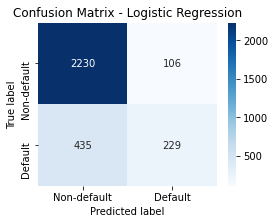

In [7]:
#Applying Logistic regression for the Default Credit card dataset

LR=LogisticRegression(max_iter=1000) 
#Default parameters used but the default solver algorithm in Logistic Regression 'lbfgs' doesn't converge at the default iteration of 100, hence increased to 1000.
LR.fit(X_train_stand,y_train)
y_pred_lr=LR.predict(X_test_stand)

print('Accuracy: ', metrics.accuracy_score(y_pred_lr,y_test)) # shows model accuracy

cv_scores=cross_val_score(LR,X_stand,y,cv=5)  # shows cross validation result of the whole dataset
print()
print(classification_report(y_test, y_pred_lr))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

#Heat map of LR after getting confusion matrix
plt.figure(figsize=(4,3))
conf_mat_LR = confusion_matrix(y_test,y_pred_lr)
sns.heatmap(conf_mat_LR,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression")

In [ ]:
# Before implementing SVM for Default credit card dataset, lets find the optimal parametes to be used
#GridSearchCV used to search the best parameters for an SVM model
#Regularization parameter-C and kernel coeffcient-gamma for default 'rbf' kernel tested
# six values given for each [0.001,0.01,0.1,1,10,100]
#this procedure took 3.5 hours for my computer, uncomment if needed. The result of this process is saved to a 'csv' file

# Tuned_parameters={'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6)}

# clf=GridSearchCV(SVC(),Tuned_parameters,cv=5)
# clf.fit(X_train_stand,y_train)
# gridsearchResult=pd.DataFrame(clf.cv_results_)
# gridsearchResult.to_csv('SVM_parameters.csv',index=False)

Accuracy:  0.8196666666666667

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2336
           1       0.70      0.32      0.44       664

    accuracy                           0.82      3000
   macro avg       0.77      0.64      0.67      3000
weighted avg       0.80      0.82      0.79      3000




Text(0.5, 1.0, 'Confusion Matrix - Support Vector Machine')

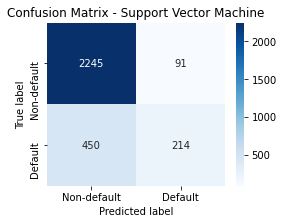

In [8]:
# from GridSearchCV I found C=1 and gamma 0.1 to be the best result from 36 iterations
#Now lets use SVC from SVM to do the default status prediction and see the result
svm_model=SVC(C=1,kernel='rbf',gamma=0.1)
svm_model.fit(X_train_stand,y_train)
y_pred_svm=svm_model.predict(X_test_stand)
print('Accuracy: ', metrics.accuracy_score(y_pred_svm,y_test))
print()
#print(cross_val_score(svm_model,X_stand,y,cv=5)) 
#print()
print(classification_report(y_test,y_pred_svm))
print()
# Heatmap after getting the confusion matrix
plt.figure(figsize=(4,3))
conf_mat_svm=confusion_matrix(y_test,y_pred_svm)
sns.heatmap(conf_mat_svm,annot=True,cmap='Blues',fmt='d',xticklabels=['Non-default','Default'],yticklabels=['Non-default','Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Support Vector Machine")

In [9]:
#Using PCA to reduce the existing features  from 84 dimentions to 2 Orthogonal meta-features
#standardized features used
pca=PCA(n_components=2)
pca.fit(X_train_stand)
X_pca=pca.transform(X_train_stand) # this is the PCA reduced training dataset
X_pca.shape   # shape shows it has only 2 features


(27000, 2)

    exp_var   PC
0  0.312745  PC1
1  0.105137  PC2


Text(0.5, 1.0, 'Percentage of explained variance')

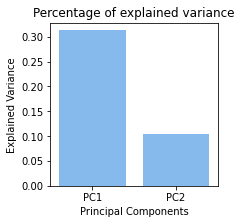

In [10]:
#Percentage of expalined variance of the two  principal components 
explained_var=pca.explained_variance_ratio_
pca_df=pd.DataFrame({'exp_var':explained_var,'PC':['PC1','PC2']})
print(pca_df)
plt.figure(figsize=(3,3))
sns.barplot(x='PC',y='exp_var',data=pca_df, color='xkcd:sky blue')
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title("Percentage of explained variance")

<Figure size 216x360 with 0 Axes>

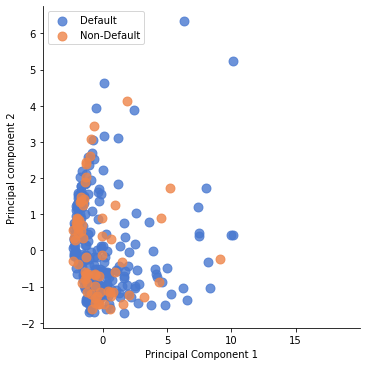

In [11]:
#Diagram of the two principal components reducing the dimentions
X_pca_test=pca.transform(X_test_stand)
pca_df_test=pd.DataFrame(data=X_pca_test,columns=['PC1','PC2'])
pca_df_test['Default']=y_test
plt.figure(figsize=(3,5))
sns.lmplot(x="PC1",y='PC2',data=pca_df_test,fit_reg=False, hue='Default',palette='muted',legend=False,scatter_kws={"s": 80})
plt.ylabel('Principal component 2')
plt.xlabel('Principal Component 1')
plt.legend(loc='upper left', labels=['Default','Non-Default'])

In [12]:
#SVM classification of the PCA reduced dimention data
svm_pca=SVC(C=1,gamma=0.1) # model that trains with new reduced data
svm_pca.fit(X_pca,y_train)

y_pred_pca=svm_pca.predict(X_pca_test)
print("Accuracy :", metrics.accuracy_score(y_test,y_pred_pca))

Accuracy : 0.7786666666666666


In [13]:
#Logistic Regression clasification of the PCA reduced dataset
LR_pca=LogisticRegression(max_iter=1000) 

LR_pca.fit(X_pca,y_train)
y_pred_pca_lr=LR_pca.predict(X_pca_test)

print('Accuracy: ', metrics.accuracy_score(y_pred_pca_lr,y_test)) # shows model accuracy

Accuracy:  0.7786666666666666


In [ ]:
#Conclusion
#Both SVM and Logistic regretion have similar scores in this dataset, with a slight advantage for SVM.
# SVM showed an accuracy of 81.73% while LogisticRegression showed 81.65%
#The reduction of features using PCA to two principal components only captured an explained variance of 40% which shows PCA is not recommended for this data set,
# Both SVM and LR perform lower on PCA reduced features with 77.88% accuracy. 


In [14]:
#Neural Network
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight

In [47]:
ncols=X_train_stand.shape[1]
early_stopping_monitor = EarlyStopping(patience=2)
class_weight = {0:ratio, 1:1-ratio}
modelNN=Sequential()
modelNN.add(Dense(25,activation='relu', input_shape=(ncols,)))
modelNN.add(Dense(25,activation='relu'))
modelNN.add(Dense(2,activation='softmax'))
modelNN.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
modelNN.fit(X_train_stand,y_train, epochs=20, validation_split=0.3, callbacks=[early_stopping_monitor],class_weight=class_weight)

Epoch 1/20
591/591 [==============================] - 1s 1ms/step - loss: 0.2385 - accuracy: 0.4805 - val_loss: 0.6933 - val_accuracy: 0.4758
Epoch 2/20
591/591 [==============================] - 1s 887us/step - loss: 0.2383 - accuracy: 0.4786 - val_loss: 0.6933 - val_accuracy: 0.3344
Epoch 3/20
591/591 [==============================] - 1s 904us/step - loss: 0.2383 - accuracy: 0.4779 - val_loss: 0.6932 - val_accuracy: 0.4691
Epoch 4/20
591/591 [==============================] - 0s 845us/step - loss: 0.2383 - accuracy: 0.4863 - val_loss: 0.6932 - val_accuracy: 0.4559
Epoch 5/20
591/591 [==============================] - 1s 881us/step - loss: 0.2383 - accuracy: 0.4970 - val_loss: 0.6932 - val_accuracy: 0.5028
Epoch 6/20
591/591 [==============================] - 1s 911us/step - loss: 0.2383 - accuracy: 0.4836 - val_loss: 0.6932 - val_accuracy: 0.5542
Epoch 7/20
591/591 [==============================] - 1s 882us/step - loss: 0.2383 - accuracy: 0.5030 - val_loss: 0.6932 - val_accuracy: 0

In [49]:
result=modelNN.evaluate(X_test_stand,y_test)
print(result)


94/94 [==============================] - 0s 560us/step - loss: 0.6931 - accuracy: 0.7497
[0.6931464672088623, 0.749666690826416]
